# Naturale Language Processing notebook example

Welcome to NLP notebook example!

The first time you run this notebook execute the following line (you can comment it next time): be sure to have requirements.txt

In [29]:
import sys
!{sys.executable} -m pip install --user -r requirements.txt

  Using cached gensim-4.1.2-cp38-cp38-win_amd64.whl (24.0 MB)
  Using cached kneed-0.5.1-py2.py3-none-any.whl (9.9 kB)
  Using cached nltk-3.4.5-py3-none-any.whl
  Using cached pandas-1.0.1-cp38-cp38-win_amd64.whl (9.2 MB)
  Using cached pyonmttok-1.28.0-cp38-cp38-win_amd64.whl (13.5 MB)
  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Using cached matplotlib-3.1.2-cp38-cp38-win_amd64.whl (9.1 MB)
  Using cached python_rake-1.4.5-py3-none-any.whl
  Using cached pytextrank-2.0.1-py3-none-any.whl (10 kB)
  Using cached Jinja2-2.11.1-py2.py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached rake_nltk-1.0.6-py3-none-any.whl (9.1 kB)
  Using cached spacy-3.1.3-cp38-cp38-win_amd64.whl (12.0 MB)
  Using cached coverage-5.5-cp38-cp38-win_amd64.whl (211 kB)
  Using cached graphviz-0.17-py3-none-any.whl (18 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached rake_nltk-1.0.5-py3-none-any.whl (8.7 kB)
  Usin

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


In [32]:
!{sys.executable} -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!conda install -c conda-forge gensim

In [ ]:
import pandas as pd 
import numpy as np
from gensim.models import Word2Vec
from time import time
import csv
import preprocessing as pp
import nlp_utility

In [3]:
df=pd.read_csv('message_example.csv')

In [4]:
df.head()

,error_category,error_message
0,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy...
1,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy...
2,COMMUNICATION_ERROR_ON_SEND,DESTINATION OVERWRITE srm-ifce err: Communicat...
3,INVALID_REQUEST_DESCRIPTOR,DESTINATION MAKE_PARENT srm-ifce err: Invalid ...
4,CONNECTION_TIMED_OUT,DESTINATION SRM_PUT_TURL srm-ifce err: Connect...


In [45]:
pd.set_option('display.max_colwidth', -1)
df.head()

,error_category,error_message,cleaned_strings
0,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Failure (Neon): SSL handshake failed: Connection timed out during SSL handshake after 1 attempts,destination overwrite failure neon ssl handshake failed connection timed out during ssl handshake after attempts
1,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Failure (Neon): SSL handshake failed: Connection timed out during SSL handshake after 1 attempts,destination overwrite failure neon ssl handshake failed connection timed out during ssl handshake after attempts
2,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: CGSI-gSOAP running on fts-atlas-006.cern.ch reports Error reading token data header: Connection closed",destination overwrite srm ifce err communication error on send err cgsi gsoap running on reports error reading token data header connection closed
3,INVALID_REQUEST_DESCRIPTOR,"DESTINATION MAKE_PARENT srm-ifce err: Invalid request descriptor, err: [SE][Mkdir][SRM_INVALID_REQUEST] httpg://storm.ifca.es:8444/srm/managerv2: srm://storm.ifca.es/srm:/srm01.ifca.es:8444/srm/managerv2?SFN=/cms/store/user/cprieels/CRAB_PrivateMC/DMscalar_Dilepton_top_tWChan_Mchi1_Mphi450_RunIIAutumn18_AODSIM_PrivateFullProd_Sep2020_v2/201106_085455/0000/log: invalid surl: srm://storm.ifca.es",destination srm ifce err invalid request descriptor err invalid surl
4,CONNECTION_TIMED_OUT,"DESTINATION SRM_PUT_TURL srm-ifce err: Connection timed out, err: [SE][StatusOfPutRequest][ETIMEDOUT] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: User timeout over",destination srm ifce err connection timed out err user timeout over


## Preprocessing
Messages are cleaned from file paths, urls etc.(this process can be time requiring)

Tokenization is done inline and tokens cleaned from a stopword list are given as input to Word2Vec model.

In [6]:
before_number=df.shape[0] #message number before cleaning
print('...cleaning')
start_time_preproc= time()
df['cleaned_strings'] = pp.clean_messages(df['error_message'])
prepr_time=time() - start_time_preproc


...cleaning


In [7]:
df_cleaned=df.copy()

In [8]:
df_cleaned.drop_duplicates(['cleaned_strings'],inplace=True)
after_number=df_cleaned.shape[0] #message number after cleaning

In [9]:
print("number of  messages before cleaning:",before_number)
print("number of  messages after cleaning:",after_number)

number of  messages before cleaning: 711828
number of  messages after cleaning: 641


In [10]:
df_cleaned

,error_category,error_message,cleaned_strings
0,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Failure (Neon): SSL handshake failed: Connection timed out during SSL handshake after 1 attempts,destination overwrite failure neon ssl handshake failed connection timed out during ssl handshake after attempts
2,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: CGSI-gSOAP running on fts-atlas-006.cern.ch reports Error reading token data header: Connection closed",destination overwrite srm ifce err communication error on send err cgsi gsoap running on reports error reading token data header connection closed
3,INVALID_REQUEST_DESCRIPTOR,"DESTINATION MAKE_PARENT srm-ifce err: Invalid request descriptor, err: [SE][Mkdir][SRM_INVALID_REQUEST] httpg://storm.ifca.es:8444/srm/managerv2: srm://storm.ifca.es/srm:/srm01.ifca.es:8444/srm/managerv2?SFN=/cms/store/user/cprieels/CRAB_PrivateMC/DMscalar_Dilepton_top_tWChan_Mchi1_Mphi450_RunIIAutumn18_AODSIM_PrivateFullProd_Sep2020_v2/201106_085455/0000/log: invalid surl: srm://storm.ifca.es",destination srm ifce err invalid request descriptor err invalid surl
4,CONNECTION_TIMED_OUT,"DESTINATION SRM_PUT_TURL srm-ifce err: Connection timed out, err: [SE][StatusOfPutRequest][ETIMEDOUT] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: User timeout over",destination srm ifce err connection timed out err user timeout over
8,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Remote copy failed with status code 0: error:14077410:SSL routines:SSL23_GET_SERVER_HELLO:sslv3 alert handshake failure",transfer error copy failed with mode pull with error transfer failed failure remote copy failed with status code alert handshake failure
10,CONNECTION_TIMED_OUT,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Request cancellation was requested.",transfer error copy failed with mode push with error request cancellation was requested
15,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Error string contains not valid UTF-8 chars",transfer error copy failed with mode pull with error error string contains not valid utf chars
16,DEVICE_OR_RESOURCE_BUSY,SOURCE SRM_GET_TURL error on the turl request : [SE][PrepareToGet][SRM_FILE_UNAVAILABLE] File is not online.,source error on the turl request file is not online
21,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: Remote copy failed with status code 507: \n",transfer error copy failed with mode push with error transfer failed failure remote copy failed with status code n
22,HOST_IS_DOWN,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Result Invalid read in request after 1 attempts,destination overwrite result invalid read in request after attempts


In [11]:
c=nlp_utility.callback()

In [12]:
corpus = pp.MyCorpus(df_cleaned)
print('...starting training')
start_time_train = time()
model = Word2Vec(sentences=corpus,compute_loss=True,size=300,window=7, min_count=1, workers=4, iter=30,callbacks=[c])
tot_time=time() - start_time_train
model.save('example_model.model')

...starting training
Loss after epoch 0: 22442.021484375
Loss after epoch 1: 20259.431640625
Loss after epoch 2: 16836.90625
Loss after epoch 3: 15761.140625
Loss after epoch 4: 15346.9609375
Loss after epoch 5: 14775.5703125
Loss after epoch 6: 13998.34375
Loss after epoch 7: 13397.453125
Loss after epoch 8: 12601.265625
Loss after epoch 9: 12366.359375
Loss after epoch 10: 11968.0
Loss after epoch 11: 11862.40625
Loss after epoch 12: 11370.34375
Loss after epoch 13: 11322.734375
Loss after epoch 14: 11211.46875
Loss after epoch 15: 10897.59375
Loss after epoch 16: 10675.171875
Loss after epoch 17: 10626.234375
Loss after epoch 18: 10453.296875
Loss after epoch 19: 10293.578125
Loss after epoch 20: 10169.875
Loss after epoch 21: 10108.65625
Loss after epoch 22: 10018.375
Loss after epoch 23: 9929.8125
Loss after epoch 24: 9919.09375
Loss after epoch 25: 9873.09375
Loss after epoch 26: 9809.15625
Loss after epoch 27: 9833.09375
Loss after epoch 28: 9615.1875
Loss after epoch 29: 9617.9

In [13]:
from matplotlib import pyplot as plt
fig, ax=plt.subplots(figsize=(13,8))
ax.scatter(np.arange(0,len(c.loss_vec)),c.loss_vec)
ax.set_xlabel('iter')
ax.set_ylabel('delta loss')


Text(0, 0.5, 'delta loss')

In [14]:
print('preprocessing time: %.2f seconds'% prepr_time)
print('training time: %.2f seconds'%tot_time)

preprocessing time: 152.56 seconds
training time: 3.42 seconds


### Just few words about MyCorpus object

Why didn't we feed word2vec model with a plain Python list of tokens? MyCorpus object is much more memory friendly! A list would reside fully in the memory;with MyCorpus object, instead, **at most one vector** resides in RAM **at a time**. In such a way the corpus can be as large as we want.

In [15]:
print(corpus)

*print* just outputs address of the object in memory. To see the constituent vectors, let’s iterate over the corpus and print each document vector (one at a time):

In [ ]:
for line in corpus:
    print(line)

## Understanding Word2Vec
Let's play a bit with our model to understand what it is doing.

Getting model vocabulary and total amount of words:

In [17]:
len(model.wv.vocab)

647

In [ ]:
model.wv.vocab

Checking the "most similar words", using the default "cosine similarity" measure:

In [19]:
print(model.wv.most_similar(positive=['pull','push'])) #sum

[('mode', 0.9976711273193359), ('copy', 0.9939081072807312), ('failure', 0.9906309843063354), ('failed', 0.9847902655601501), ('transfer', 0.9692242741584778), ('remote', 0.9616655111312866), ('problem', 0.9438344240188599), ('side', 0.9421212673187256), ('put', 0.9365221858024597), ('code', 0.9316742420196533)]


In [20]:
print(model.wv.most_similar(positive=['pull'],negative=['push']))#difference

[('communicat', 0.65594482421875), ('geonmo', 0.637493371963501), ('sub', 0.6236143708229065), ('affecting', 0.520751416683197), ('whole', 0.5198365449905396), ('fr', 0.516080379486084), ('subj', 0.5087780952453613), ('communications', 0.5014863610267639), ('found', 0.49153006076812744), ('rsa', 0.48807674646377563)]


Getting similarity score for each pair and checking not matching word:

In [21]:
pairs = [
    ('pull', 'push'),  #similar role
    ('pull', 'copy'),   #often close
    ('pull', 'time'),  #sometimes appearing together
    ('pull', 'directory'),    # sometimes appearing together
    ('pull', 'not'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))


'pull'	'push'	0.97
'pull'	'copy'	0.99
'pull'	'time'	0.32
'pull'	'directory'	-0.30
'pull'	'not'	-0.12


In [22]:
print(model.wv.doesnt_match(['pull','push','mode','not']))

not


/eos/user/m/miolocco/.local/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
df_cleaned['error_message'][df_cleaned['error_message'].astype(str).str.contains('pull',na=False)]

In [ ]:
df_cleaned[(df_cleaned['error_message'].astype(str).str.contains('pull',na=False)) & (df_cleaned['error_message'].astype(str).str.contains('directory',na=False) )]

Even if 'pull' and 'push' never appear together the model understands they have similar role (high similarity score): 

In [25]:
df_cleaned[(df_cleaned['error_message'].astype(str).str.contains('pull',na=False)) & (df_cleaned['error_message'].astype(str).str.contains('push',na=False) )]

,error_category,error_message,cleaned_strings


Dictionary of known words and their frequency in the corpus:

In [ ]:
w2c = dict()
for item in model.wv.vocab:
    w2c[item] = model.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
w2cSortedList = list(w2cSorted.keys())
w2cSorted

## Getting more into NLP tasks

### Example of Supervised Learning
Let's test model ability to associate the right error category.

In [27]:
model_name='example_model.model'
model=Word2Vec.load(model_name)

In [28]:
vectors_sent=nlp_utility.vectorize_messages(df_cleaned['cleaned_strings'],model,tf_idf=True)

In [29]:
len(vectors_sent)


641

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(vectors_sent,df_cleaned['error_category'].values,test_size=0.2, random_state = 42)
mex_train, mex_test,cat_train, cat_test = train_test_split(df_cleaned['error_message'].values,df_cleaned['error_category'].values,test_size=0.2, random_state = 42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logreg = LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced',multi_class='auto',solver='lbfgs',max_iter=170)
logreg = logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.6124031007751938
                             precision    recall  f1-score   support

     CANNOT_ALLOCATE_MEMORY       0.00      0.00      0.00         1
COMMUNICATION_ERROR_ON_SEND       0.83      0.59      0.69        34
         CONNECTION_REFUSED       0.00      0.00      0.00         0
       CONNECTION_TIMED_OUT       0.50      0.83      0.62         6
    DEVICE_OR_RESOURCE_BUSY       0.00      0.00      0.00         0
        DISK_QUOTA_EXCEEDED       0.00      0.00      0.00         0
                FILE_EXISTS       1.00      0.33      0.50         3
   FUNCTION_NOT_IMPLEMENTED       0.00      0.00      0.00         0
               HOST_IS_DOWN       0.60      0.75      0.67         8
         INPUT/OUTPUT_ERROR       0.94      0.60      0.73        48
    INTERRUPTED_SYSTEM_CALL       0.00      0.00      0.00         1
           INVALID_ARGUMENT       0.14      1.00      0.25         1
           INVALID_EXCHANGE       0.00      0.00      0.00         0
 INVA

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Possible warnings if some labels in y_test don't appear in y_pred (i.e some labels are never predicted)

In [32]:
set(y_test) - set(y_pred) #if empty you shouldn't have warnings

{'CANNOT_ALLOCATE_MEMORY',
 'INTERRUPTED_SYSTEM_CALL',
 'INVALID_REQUEST_DESCRIPTOR',
 'OPERATION_NOT_PERMITTED'}

In [ ]:
d={'y_test':y_test,'y_pred':y_pred,'mex':mex_test}
df_comparison=pd.DataFrame(data=d)
df_comparison

### 2-D Visualization of vector space: words and error messages (cleaned)

In [ ]:
#allows interactive cursors

In [35]:
%matplotlib nbagg 

<IPython.core.display.Javascript object>


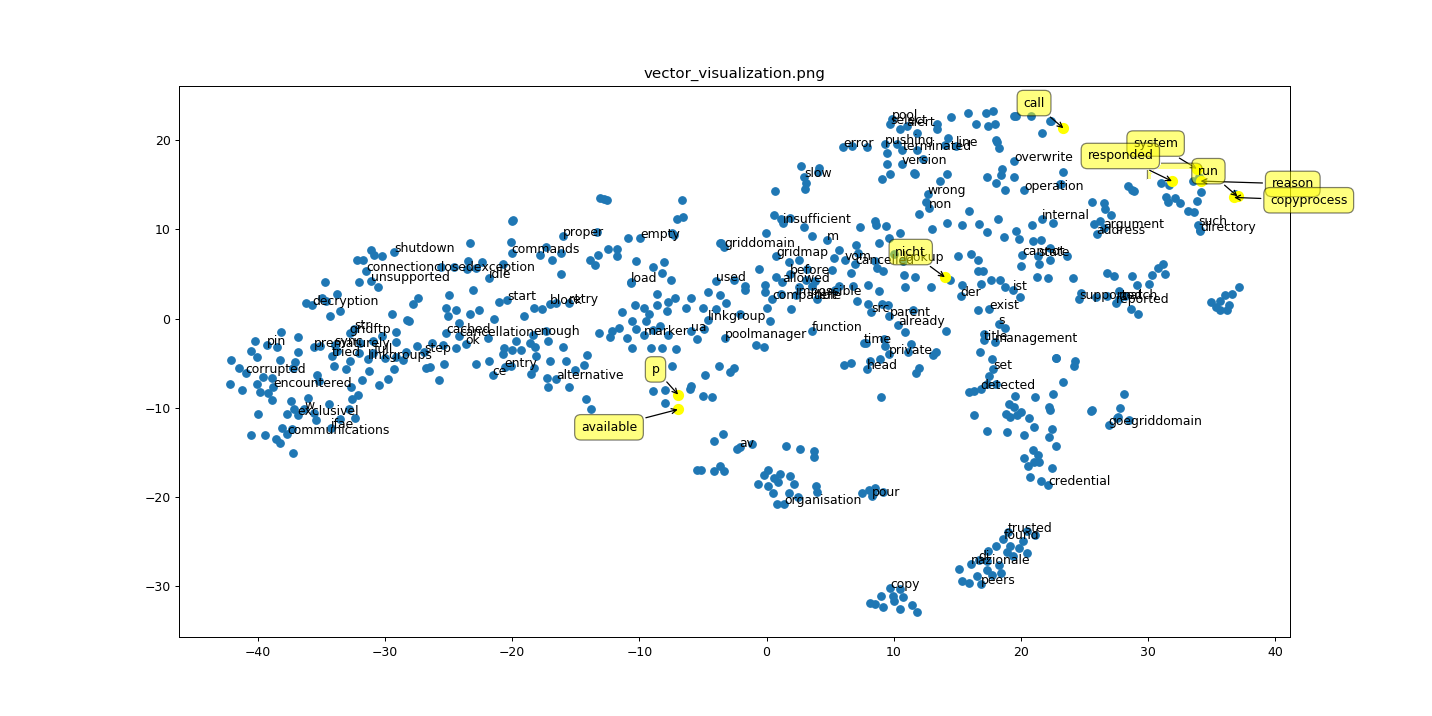

In [40]:
title='vector_visualization.png'
x_vals, y_vals, labels =nlp_utility.reduce_dimensions(model)
figsize=(16, 8)
nlp_utility.plot_with_matplotlib(x_vals, y_vals, labels,figsize,title=title)


Click on a point to visualize the annotation associated.
To move the box, click on it and drag.

<IPython.core.display.Javascript object>


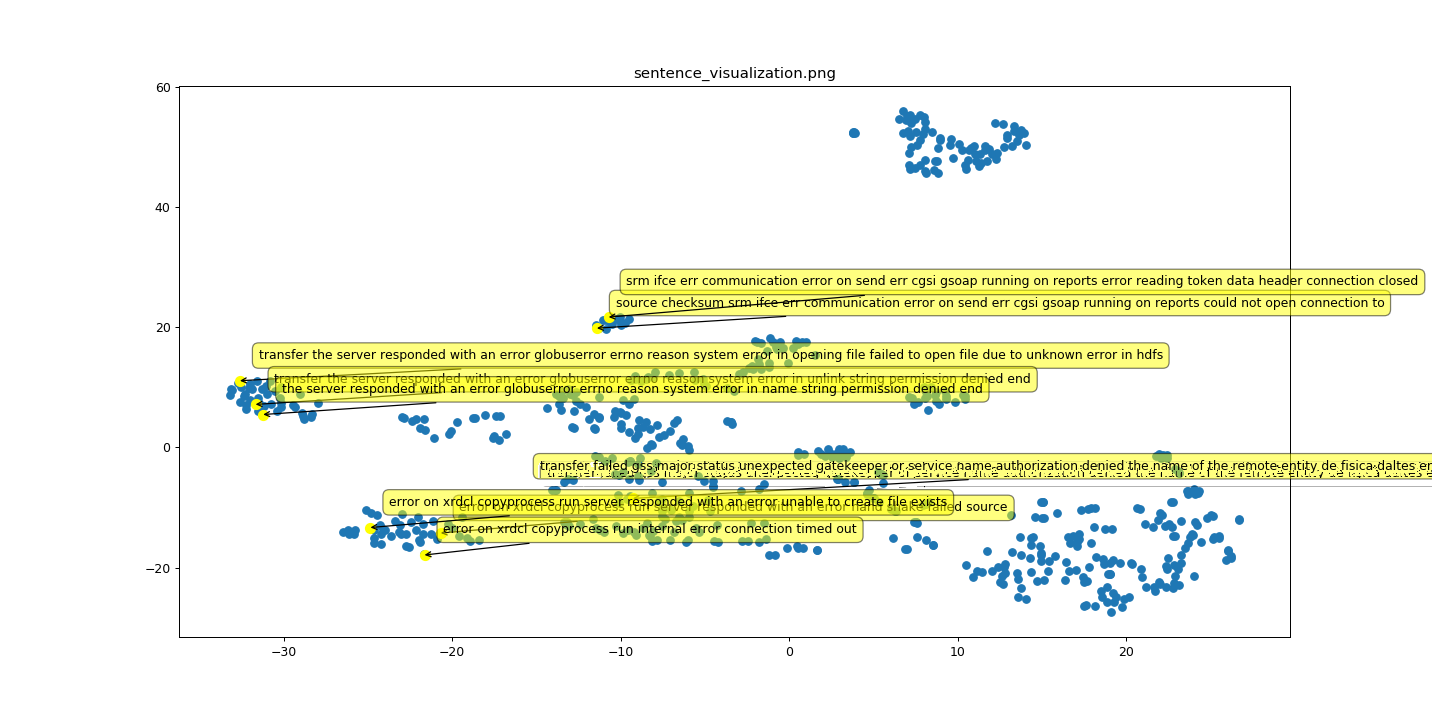

In [43]:
title='sentence_visualization.png'

df_cleaned['vectors_sent']=vectors_sent.tolist()
x_vals_sent, y_vals_sent, labels_sent=nlp_utility.reduce_sent_dimensions(df_cleaned)
figsize=(16,8)
nlp_utility.plot_with_matplotlib(x_vals_sent, y_vals_sent, labels_sent,figsize,npoints=0,save=True,title=title)

